In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag
from plot_utils import plot_histogram

np.random.seed(33)

In [2]:
%matplotlib inline

In [3]:
def plot_angles_cube_space(N, lp, n_iter=100, D=2):
    angles = []

    for _ in tqdm(range(n_iter)):
        DAG = dag.CubeSpaceGraph(lp=lp)
        R = dag.cube_space_interval(N, D)
        DAG.generate_graph(R, weighted=True)
        greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
        angles.extend(DAG.compute_path_property(greedy_forward, dag.paths.get_angles).values())

    angles = np.array(angles)
    plot_histogram(angles, density=True, title=f'Angles (Cube Space - Forward Greedy Shortest Path, p = {lp})',
                   x_label='Angle (radians)', add_vertical_lines=False, beta_fit=False)

100%|██████████| 250/250 [01:10<00:00,  3.55it/s]


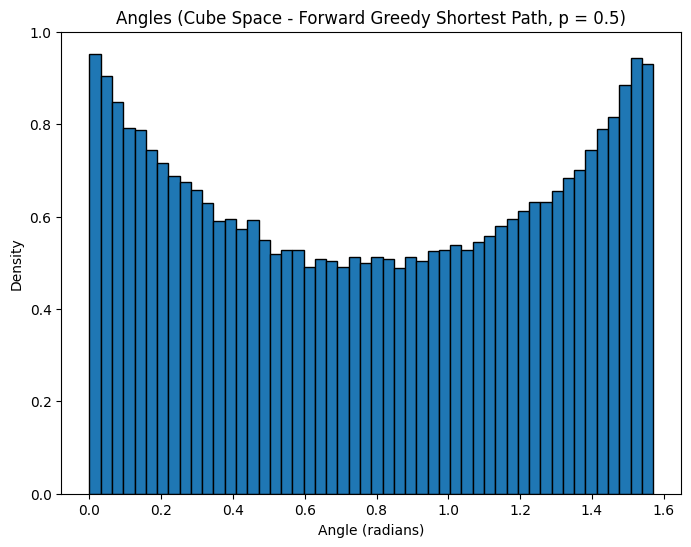

In [4]:
plot_angles_cube_space(N=500, lp=0.5, n_iter=250)

100%|██████████| 250/250 [01:08<00:00,  3.65it/s]


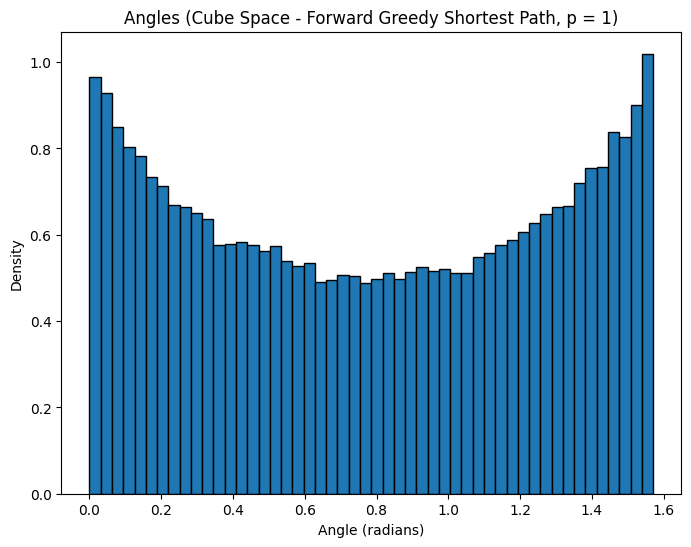

In [5]:
plot_angles_cube_space(N=500, lp=1, n_iter=250)

100%|██████████| 250/250 [01:06<00:00,  3.74it/s]


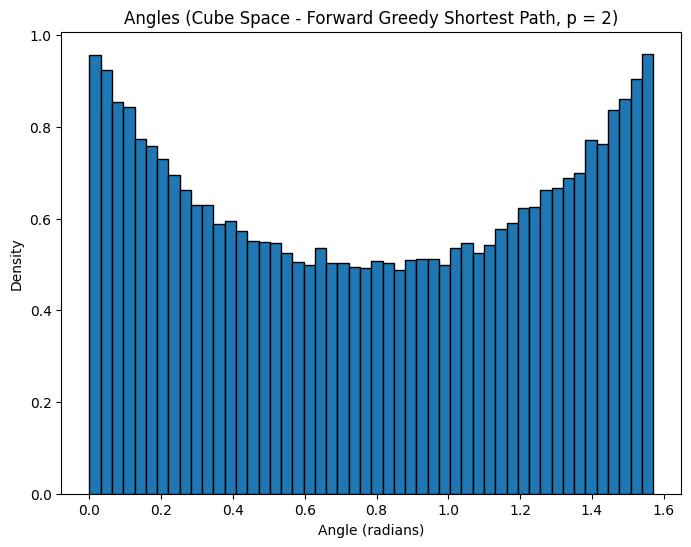

In [6]:
plot_angles_cube_space(N=500, lp=2, n_iter=250)